<a href="https://colab.research.google.com/github/sonawanenavanit/DeepLearning/blob/main/credit_card_churn_classification_model_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [10]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [12]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [33]:
X_train.shape[1]

11

In [13]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [21]:
X = df.drop(columns='Exited')
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3273 - loss: 0.7828 - val_accuracy: 0.7969 - val_loss: 0.5550
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.5352 - val_accuracy: 0.7969 - val_loss: 0.5026
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7958 - loss: 0.5035 - val_accuracy: 0.7969 - val_loss: 0.4978
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.5006 - val_accuracy: 0.7969 - val_loss: 0.4973
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4928 - val_accuracy: 0.7969 - val_loss: 0.4972
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.5028 - val_accuracy: 0.7969 - val_loss: 0.4967
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7991 - loss: 0.4949 - val_accuracy: 0.7969 - val_loss: 0.4963
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.4994 - val_accu

In [56]:
y_pred = model.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
model.layers[0].get_weights()

[array([[ 0.27077475, -0.33755517,  0.35939312,  0.24805945,  0.6118079 ,
          0.3003019 , -0.45975605,  0.26555064, -0.51050776, -0.04359641,
          0.22949994],
        [ 0.34739524,  0.0097084 , -0.39291722, -0.25320122,  0.46824968,
         -0.15585047, -0.00568688, -0.35174483, -0.38199598,  0.1680181 ,
         -0.12083345],
        [-0.4088364 ,  0.2485528 ,  0.33348337,  0.54926735,  0.23476881,
         -0.3288416 ,  0.03594059,  0.5193558 , -0.0719964 ,  0.20099439,
         -0.03973123],
        [ 0.49324158, -0.32988995, -0.24424668, -0.05724099, -0.4401562 ,
          0.4060219 , -0.06881022, -0.43405145, -0.10976952, -0.01710927,
          0.07346691],
        [-0.10325793,  0.1795736 ,  0.4358631 ,  0.29874864, -0.06685083,
          0.47719443, -0.412823  ,  0.14271975, -0.0564648 ,  0.39325863,
         -0.33733788],
        [ 0.14486045, -0.08924729, -0.31842682,  0.24175778,  0.2703677 ,
          0.0222168 ,  0.12502813, -0.2578709 ,  0.23449732, -0.0728123

In [58]:
y_pred

array([[0.23893552],
       [0.23893552],
       [0.2378876 ],
       ...,
       [0.2378876 ],
       [0.23737818],
       [0.23893552]], dtype=float32)

In [59]:
y_pred = y_pred.argmax(axis=-1)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [61]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

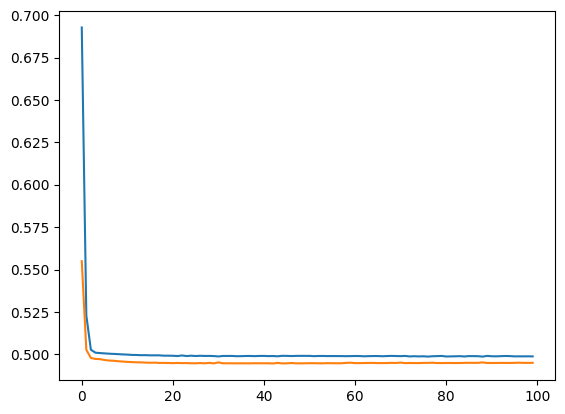

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

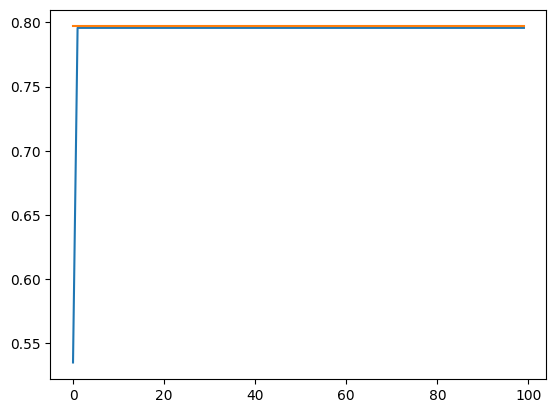

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])